# **Digital Signal and Image Management - E03**<br/>
**Master's Degree in Data Science (A.Y. 2024/2025)**<br/>
**University of Milano - Bicocca**<br/>


* An **image** is encoded digitally as a matrix of values:
  * Two dimensions for a grayscale image (height and width)
  * Three dimensions for a color image (height, width, and color channels)
* We will use grayscale images to experiment with various processing **operators**
  * Punctual operators
  * Local operators
* We will use color images to understand different types of **color encoding**

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

In [2]:
# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height
#Impostando figure.figsize, tutte le figure successive avranno una dimensione di 15x5 pollici

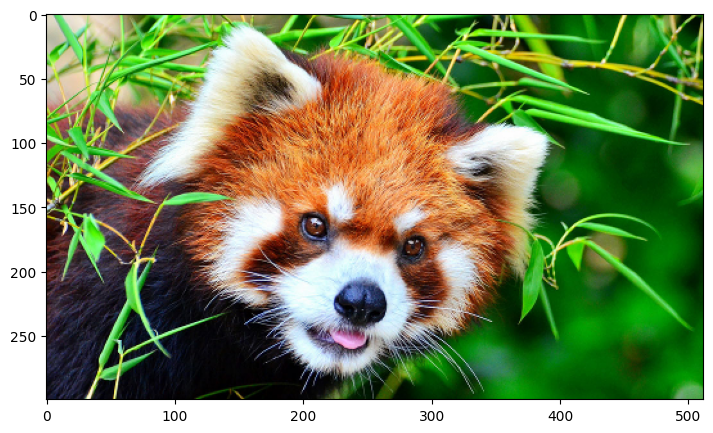

In [5]:
# Import image with skimage, and visualize with matplotlib
im = io.imread('redpanda.png')
plt.imshow(im); plt.show()

Utilizziamo skimage perché è leggero e perché importa automaticamente i dati come array numpy.
Altre possibilità sono Pillow (PIL) e OpenCV. Potremmo usarli in esercizi futuri:

# Pillow
conda installa pillow
da PIL importare Immagine
im = Image.open('redpanda.png')
im = np.asarray(im) # Necessita di una conversione esplicita in array numpy

# OpenCV
pip installa opencv-python
importare cv2 come cv
im = cv.imread('redpanda.png')
im = im[::-1:-1:0] # Necessita di un cambiamento nell'ordine dei canali (BGR -> RGB)

In [6]:
# Class and data type
print(type(im))
print(im.dtype)

<class 'numpy.ndarray'>
uint8


A seconda della versione corrente di scikit-image, la classe può essere numpy.ndarray o imageio.core.utils.Array.
Il secondo caso eredita tutti gli attributi e i metodi dal primo.
Quando si carica un'immagine, controllare sempre il tipo di dati. Può essere uno di questi due:
uint8: valori interi compresi tra 0 e 255.
float64: valori in virgola mobile tra 0 e 1.
Alcune operazioni funzionano in entrambe le rappresentazioni, altre no (ad esempio, la correzione gamma).

In [7]:
# Image size
im.shape
#300 rows (height)

#512 columns (width)

#4 channels: Red, Green, Blue

(300, 512, 4)

Il canale alfa viene utilizzato per codificare la trasparenza/opacità:
1 significa che il pixel copre completamente lo sfondo
0 significa che il colore RGB del pixel è irrilevante, poiché verrà mostrato solo lo sfondo.
Qualsiasi valore intermedio codifica una media ponderata tra il colore dello sfondo e il colore del pixel.
È supportato solo da alcuni formati di immagine (ad esempio, png) ed è comunque opzionale.
In molte applicazioni avremo bisogno di lavorare solo su un canale.
Un modo per farlo è quello di convertire l'immagine in scala di grigi (vedere il prossimo paragrafo).

##Grayscale import

In [37]:
im = io.imread('redpanda.png', as_gray=True) #carico immagine in scala di grigi

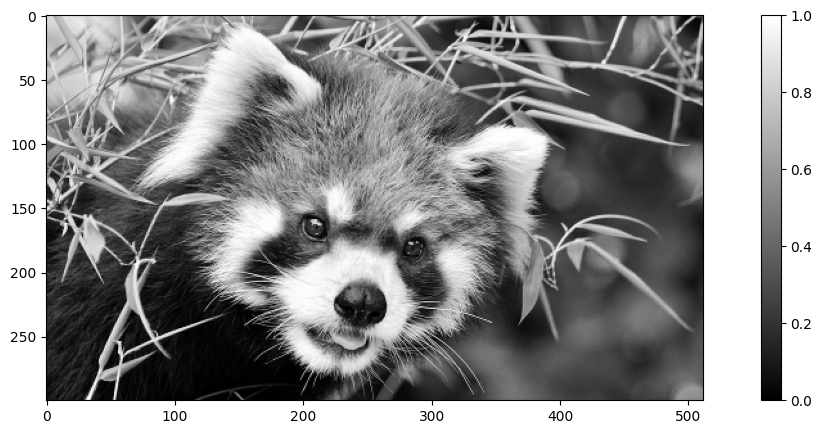

In [38]:
plt.imshow(im, cmap='grey'); plt.clim(0,1); plt.colorbar(); plt.show()
# mappa di colori gray, che rappresenta l'immagine in scala di grigi.
# plt.clim(0, 1) Imposta i limiti del colore, forzando l'immagine a mostrare valori di intensità da 0 (nero) a 1 (bianco).
# plt.colorbar() Aggiunge una barra dei colori accanto all'immagine, che indica l'intensità dei pixel da 0 a 1.
# plt.show() mostra immagine

In [23]:
# Image size
im.shape

(300, 512)

In [24]:
# Class and data type
print(type(im))
print(im.dtype)

<class 'numpy.ndarray'>
float64



La scala di grigi è una combinazione lineare (media ponderata) tra i tre canali R, G e B, dove il verde ha il peso maggiore.
Il caricamento di un'immagine con skimage utilizzando as_gray=True trasforma anche i dati in una rappresentazione in virgola mobile con valori compresi tra 0 e 1.
Anche altre librerie possono caricare un'immagine in scala di grigi, lanciando i seguenti comandi:
# Pillow
im = Image.open('images/redpanda.png').convert('L')
https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

# OpenCV
im = cv.imread('images/redpanda.png', 0)

Il parametro cmap='gray' è usato per specificare la mappa di colore usata per visualizzare le immagini a canale singolo.
In questo caso (dtype=float64), mostra il valore più basso come nero e quello più alto come bianco.
Utilizzando plt.clim(0,1) si visualizzano come neri tutti i pixel con valore 0 (e inferiore) e come bianchi tutti i pixel con valore 1 (e superiore).

##Punctual processing

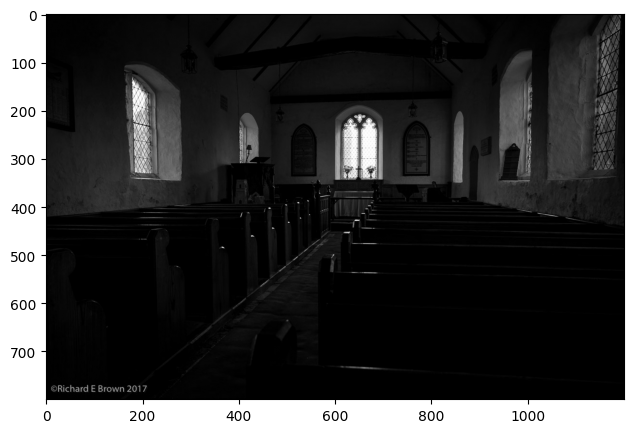

In [39]:
# Loading a dark image
im = io.imread('church.jpg', as_gray=True)
plt.imshow(im, cmap='gray'); plt.clim(0,1); plt.show()

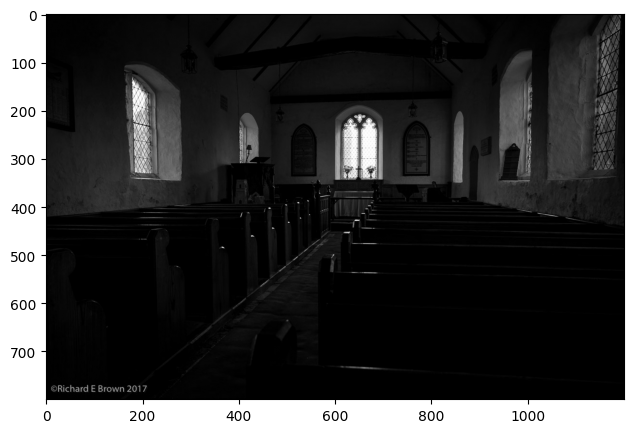

In [42]:
# @title  {"run":"auto"}
# Brightening the image using the sum
bright_sum = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
plt.imshow(im+bright_sum, cmap='gray'); plt.clim(0,1); plt.show()
#Aggiunge il valore bright_sum a ogni pixel dell'immagine im,
#aumentando o diminuendo la luminosità generale.
#Se bright_sum è positivo, l'immagine diventa più chiara;
#se è negativo, l'immagine diventa più scura.

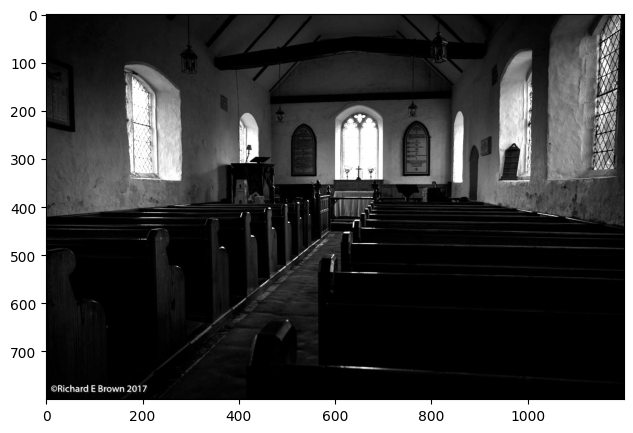

In [44]:
# @title  {"run":"auto"}
# Brightening the image using the multiplication
#modifica la luminosità di un'immagine moltiplicando ogni pixel per un valore di scala,
bright_mul = 2.7 #@param {type:"slider", min:0, max:5, step:0.1}
plt.imshow(im*bright_mul, cmap='gray'); plt.clim(0,1); plt.show()
#aumentando o riducendo l'intensità generale della luminosità.
#bright_mul > 1 immagine piu luminosa
#bright_mul compreso tra 0 e 1 più scura

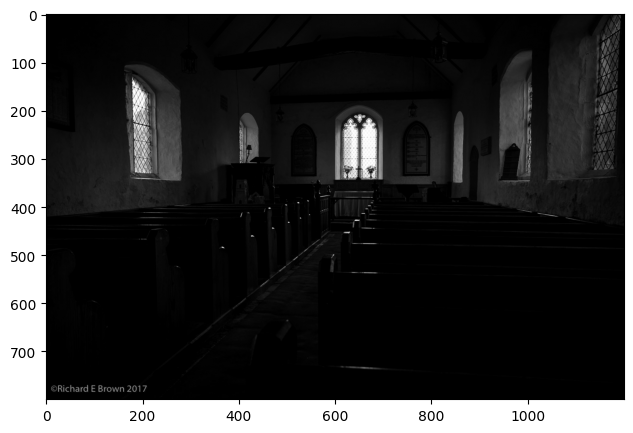

In [50]:
# @title  {"run":"auto"}
# Brightening the image using the power (a.k.a. Gamma)
#modificare la luminosità con correzione gemma
bright_pow = 1.2 #@param {type:"slider", min:0.1, max:2, step:0.1}
plt.imshow(im**bright_pow, cmap='gray'); plt.clim(0,1); plt.show()
#Se bright_pow è minore di 1 (come 0.5), l’immagine diventa più luminosa,
#poiché eleva i valori dei pixel a una potenza più bassa, spostandoli verso 1.
#se maggiore di 1 (fino a 2), l’immagine diventa più scura.

##Image manipulation


##rescaling,resizing

In [51]:
# Initial resolution
im.shape

(800, 1200)

In [52]:
# Computing the new image size (20%)
new_shape = (int(im.shape[0]*0.2), int(im.shape[1]*0.2))

In [53]:
new_shape

(160, 240)

In [54]:
# Resize
im_small = transform.resize(im, new_shape)

In [56]:
# Final resolution
im_small.shape
#We have computed the new resolution as 20% for each side of the original image

(160, 240)

##overlap

In [57]:
# Create a copy of the full-resolution image
im_over = im.copy()

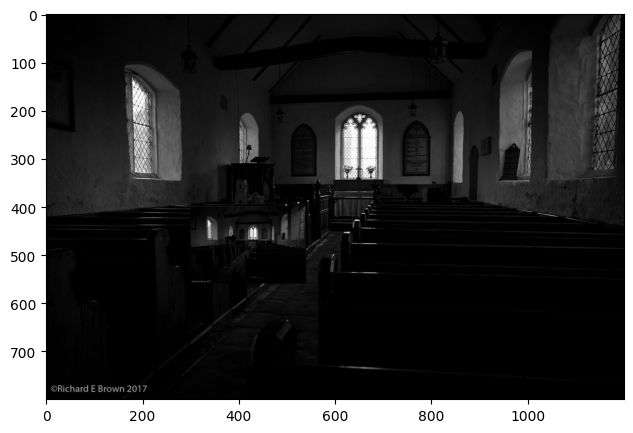

In [58]:
# Paste the small-resolution image over the full-resolution one
im_over[400:400+im_small.shape[0], 300:300+im_small.shape[1]] = im_small
plt.imshow(im_over, cmap='gray'); plt.show()

Abbiamo sostituito i pixel dell'immagine più grande, a partire dalla riga 400 e dalla colonna 300, inserendo i pixel dell'immagine più piccola.
Questa semplice operazione può tornare utile in molte applicazioni future.

##Local processing (filtering)

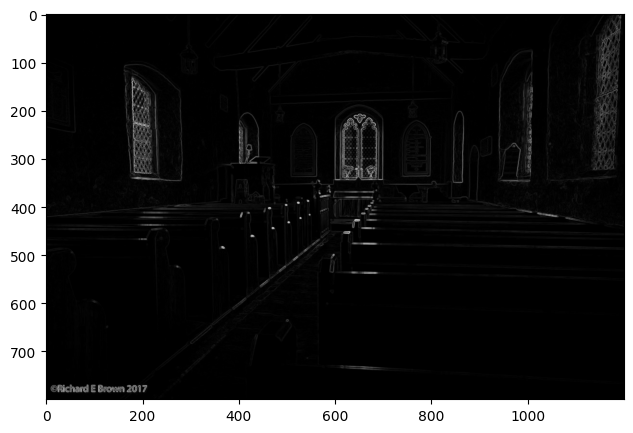

In [61]:
# Linear filtering to extract the edges
im_edge = filters.sobel(im) #applico filtro sobel
plt.imshow(im_edge, cmap='gray'); plt.show()

Il filtro Sobel è un rilevatore di bordi: produce una “mappa” con valori elevati nei punti in cui l'immagine originale presenta bruschi cambiamenti tra pixel chiari e scuri e valori più bassi in altri punti.
filters.sobel() calcola direttamente la grandezza del bordo in tutte le direzioni.

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


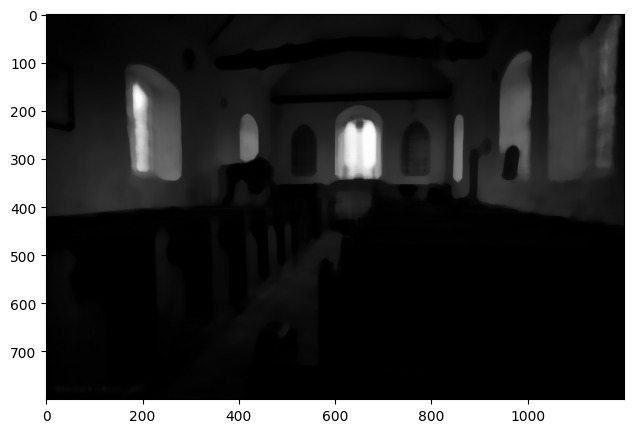

In [62]:
# Ranking filter
se = np.ones((21,21)) # Structural element
im_order = filters.rank.percentile(im, se, p0=0.5)
plt.imshow(im_order, cmap='gray'); plt.show()
#applica un filtro di ranking percentile all'immagine im, utilizzando un elemento strutturale se e selezionando il percentile 50 (mediana) per il filtro.
#il 50º percentile è equivalente alla mediana, quindi questo filtro funge da filtro mediano, utile per ridurre il rumore senza sfocare troppo i bordi.


##color management

In [63]:
# Re-open the red panda image
im = io.imread('redpanda.png')

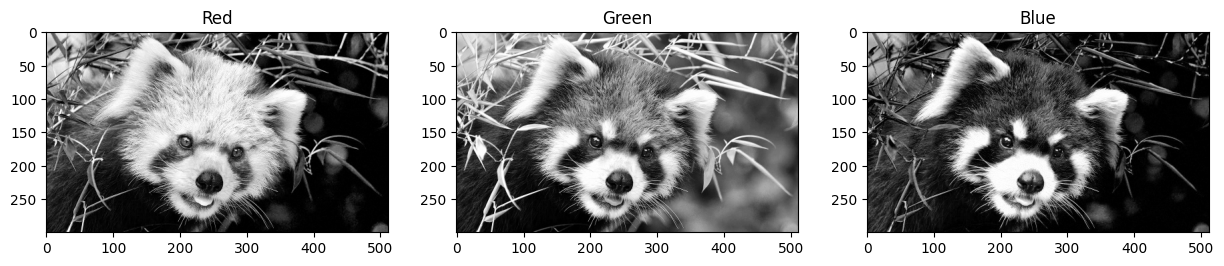

In [68]:
# Visualization of R,G,B channels
plt.subplot(1,3,1); plt.imshow(im[:,:,0], cmap='gray'); plt.title('Red') # plt.imshow(im[:,:,0] accede ai pixel sul canale rosso
plt.subplot(1,3,2); plt.imshow(im[:,:,1], cmap='gray'); plt.title('Green')# plt.imshow(im[:,:,1] accede ai pixel sul canale verde
plt.subplot(1,3,3); plt.imshow(im[:,:,2], cmap='gray'); plt.title('Blue') # plt.imshow(im[:,:,1] accede ai pixel sul canale blu
plt.show()

Ogni canale codifica la quantità di rosso, verde o blu per ogni pixel.
Si noti ad esempio:

Valori elevati per il canale verde sulle foglie

Valori elevati per il canale rosso sulla fronte

Valori elevati su tutti i canali per le aree bianche e valori bassi su tutti i canali per le aree nere.

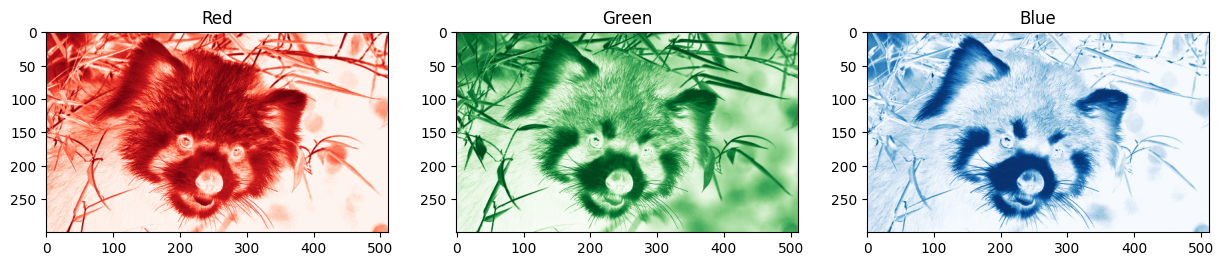

In [74]:
# Visualization of R,G,B channels using color maps
plt.subplot(1,3,1); plt.imshow(im[:,:,0], cmap='Reds'); plt.title('Red')
plt.subplot(1,3,2); plt.imshow(im[:,:,1], cmap='Greens'); plt.title('Green')
plt.subplot(1,3,3); plt.imshow(im[:,:,2], cmap='Blues'); plt.title('Blue')
plt.show()

##Hue Saturation Value (HSV)

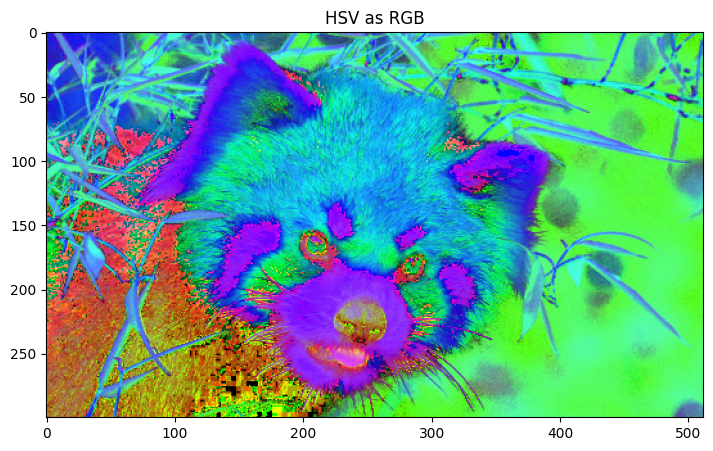

In [80]:
# Conversion from RGB to HSV
im_hsv = color.rgb2hsv(im[:,:,0:3])
plt.imshow(im_hsv); plt.title('HSV as RGB'); plt.show()

Stiamo interpretando i numeri che codificano la tonalità come se codificassero il rosso. La saturazione come se fosse verde e il valore di “luminosità” come se fosse blu.

È più appropriato visualizzare ciascun canale in modo indipendente.

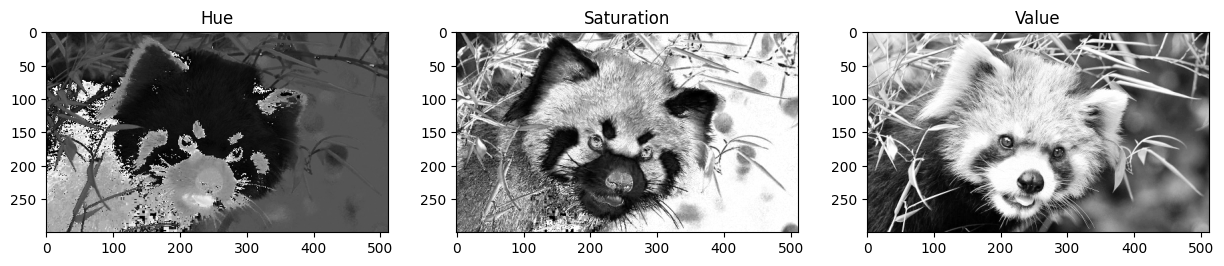

In [ ]:
# Independent visualization of H,S,V channels
plt.subplot(1,3,1); plt.imshow(im_hsv[:,:,0], cmap='gray'); plt.title('Hue')
plt.subplot(1,3,2); plt.imshow(im_hsv[:,:,1], cmap='gray'); plt.title('Saturation')
plt.subplot(1,3,3); plt.imshow(im_hsv[:,:,2], cmap='gray'); plt.title('Value')
plt.show()

Valore: è correlato al concetto di “luminosità” (sebbene la luminosità abbia una propria definizione).
È diverso dai risultati ottenuti con la conversione da RGB a scala di grigi, ma concettualmente simile.

Saturazione: quanto un determinato pixel si avvicina a un colore “puro”.
Un valore basso rappresenta i grigi (compresi il bianco e il nero). Un valore alto rappresenta un colore “brillante”.

Tinta: indipendentemente da saturazione e valore, identifica il tipo di colore sulla ruota dei colori.
È rappresentata in gradi su un cerchio, quindi i colori vicini a 0 sono simili a quelli vicini a 360 (o qualunque sia il valore massimo utilizzato per la codifica).
Si noti anche che il valore della tinta non ha alcun significato quando la saturazione è pari a 0.

##**ASSIGNMENT**
**image compression based on color representation**

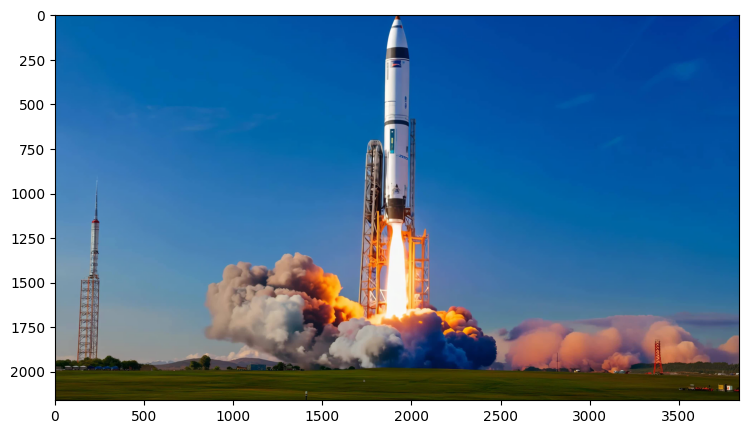

In [81]:
# Import and visualize image
razzo = io.imread('razzo.jpg')
plt.imshow(razzo); plt.show()

In [118]:
# Convert to YCbCr
razzo_ycbcr = color.rgb2ycbcr(razzo)

# compress_CbCr

In [147]:
def compress_CbCr(im, sigma):
    razzo_ycbcr = color.rgb2ycbcr(im)
    # Extract Y, Cb, Cr channels, channel separation
    Y, Cb, Cr = razzo_ycbcr[:,:,0], razzo_ycbcr[:,:,1], razzo_ycbcr[:,:,2]

    # Application of Gaussian filter, try different values for blur level
    # Adjust sigma for desired blur level
    Cb_filtered = filters.gaussian(Cb, sigma=sigma) # for the cb channel
    Cr_filtered = filters.gaussian(Cr, sigma=sigma) # for the cr channel

    # Reconstruct the image with blurred Cb and Cr
    razzo_ycbcr_filtered = np.stack((Y, Cb_filtered, Cr_filtered), axis=-1)

    # Converting the blurred YCbCr image to RGB
    razzo_rgb_reconstructed = color.ycbcr2rgb(razzo_ycbcr_filtered)

    # Return filtered YCbCr image and reconstructed RGB image
    return razzo_ycbcr_filtered, razzo_rgb_reconstructed

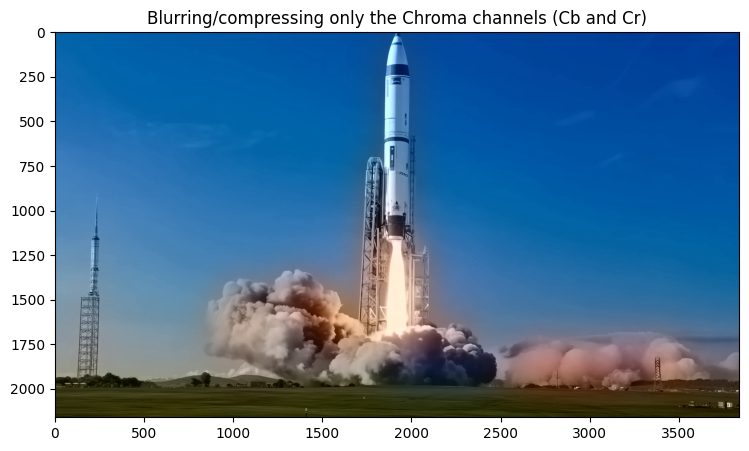

In [161]:
im_ycbcr_filtered, im_rgb_reconstructed = compress_CbCr(razzo, 100)
plt.title('Blurring/compressing only the Chroma channels (Cb and Cr)')
plt.imshow(im_rgb_reconstructed) # Passa solo l'immagine ricostruita a plt.imshow
plt.show()

Version of the original image with a colour compression (blurring of the Cb and Cr channels). The structure and brightness of the image remain unchanged, while colours appear less defined due to the blurring applied to the colour channels.

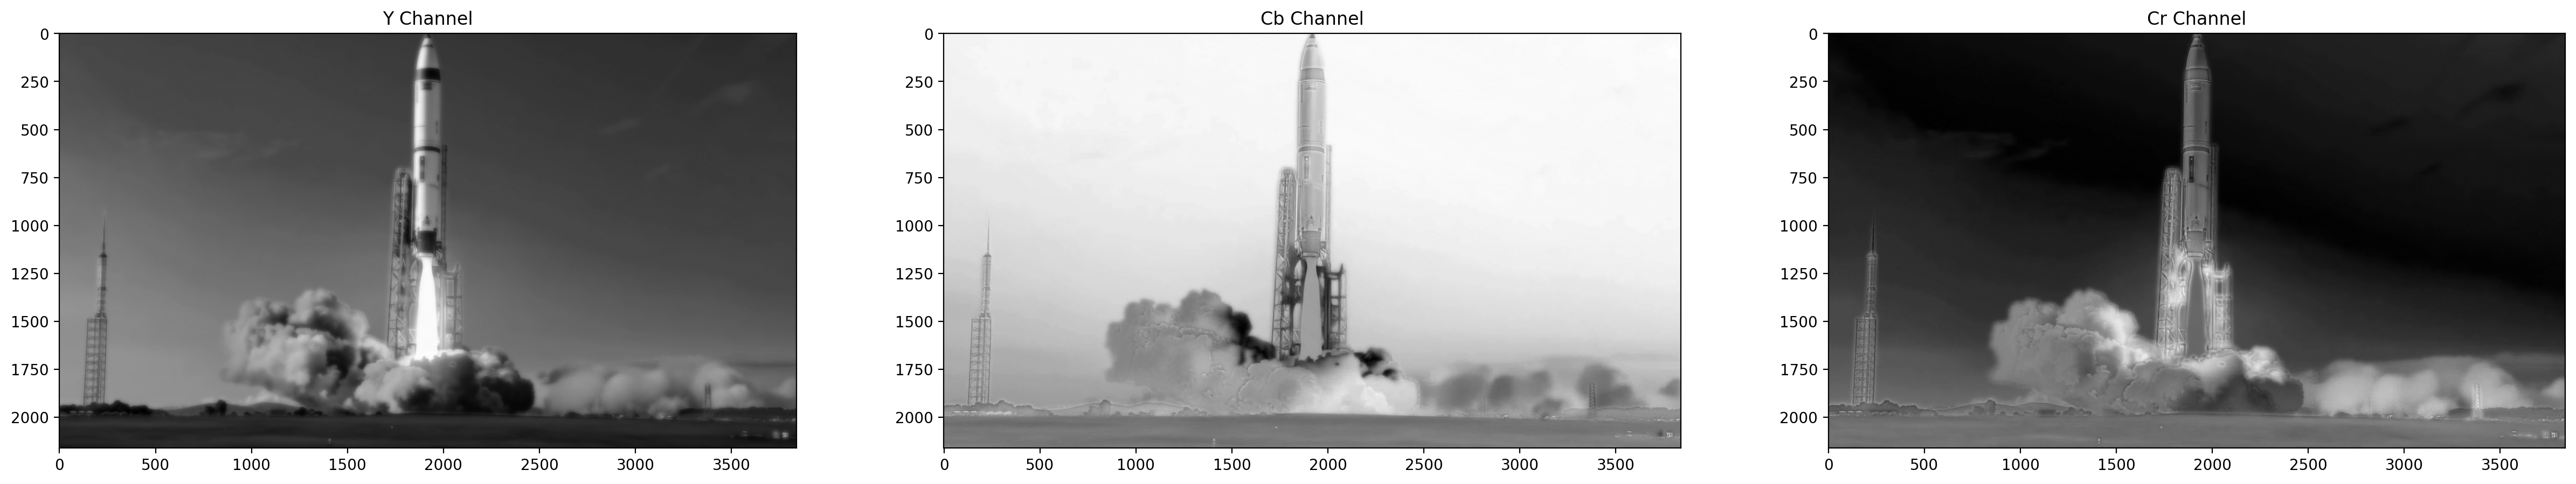

In [162]:
sigma = 10
reconstructed_image, filtered_ycbcr = compress_CbCr(razzo_ycbcr, sigma)

fig, axes = plt.subplots(1, 3, figsize=(30, 12), dpi = 200)
axes[0].imshow(filtered_ycbcr[:,:,0], cmap='gray'); axes[0].set_title('Y Channel') #
axes[1].imshow(filtered_ycbcr[:,:,1], cmap='gray'); axes[1].set_title('Cb Channel')
axes[2].imshow(filtered_ycbcr[:,:,2], cmap='gray'); axes[2].set_title('Cr Channel')
plt.show()

As the filter is applied on the cb and cr channels the y-channel remains unchanged (first image) while the other two, which will be more blurred due to the filter!

# compress_Y

In [163]:
def compress_Y(im, sigma):

  # Image conversion to YCbCr colour space
  im_ycbcr = color.rgb2ycbcr(im)

  # Extracting channels
  Y, Cb, Cr = im_ycbcr[:,:,0], im_ycbcr[:,:,1], im_ycbcr[:,:,2]

  # Apply Gaussian filter to the Y channel
  Y_filtered = filters.gaussian(Y, sigma=sigma)

  # Reconstructing the image in YCbCr with the fuzzy Y channel
  razzo_ycbcr_filtered = np.stack((Y_filtered, Cb, Cr), axis=-1)

  # Reconverting the image to rgb
  razzo_rgb_reconstructed = color.ycbcr2rgb(razzo_ycbcr_filtered)

  # Returns the reconstructed RGB image and the modified YCbCr image
  return razzo_rgb_reconstructed, razzo_ycbcr_filtered

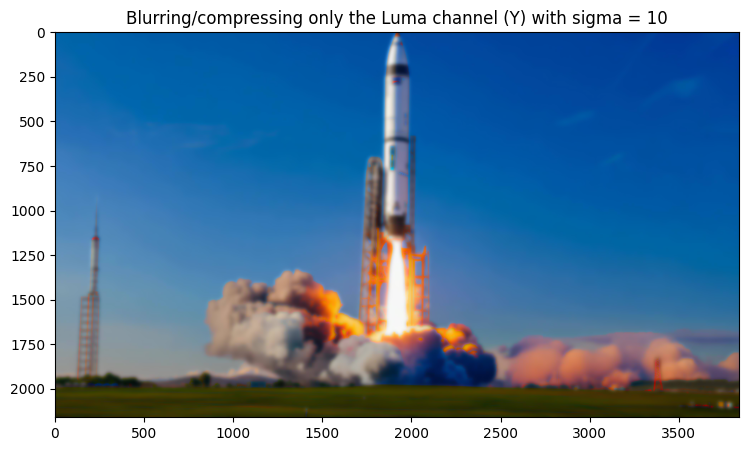

In [158]:
im_rgb_reconstructed, im_ycbcr_filtered = compress_Y(razzo, 10)
plt.title(f'Blurring/compressing only the Luma channel (Y) with sigma = {sigma}')
plt.imshow(im_rgb_reconstructed)
plt.show()

The image will be blurred according to the set sigma value, the Cb and Cr channels (the colours) have not been changed, there will be a distortion in brightness (some bright areas may appear more blurred) while the colours will remain unchanged.

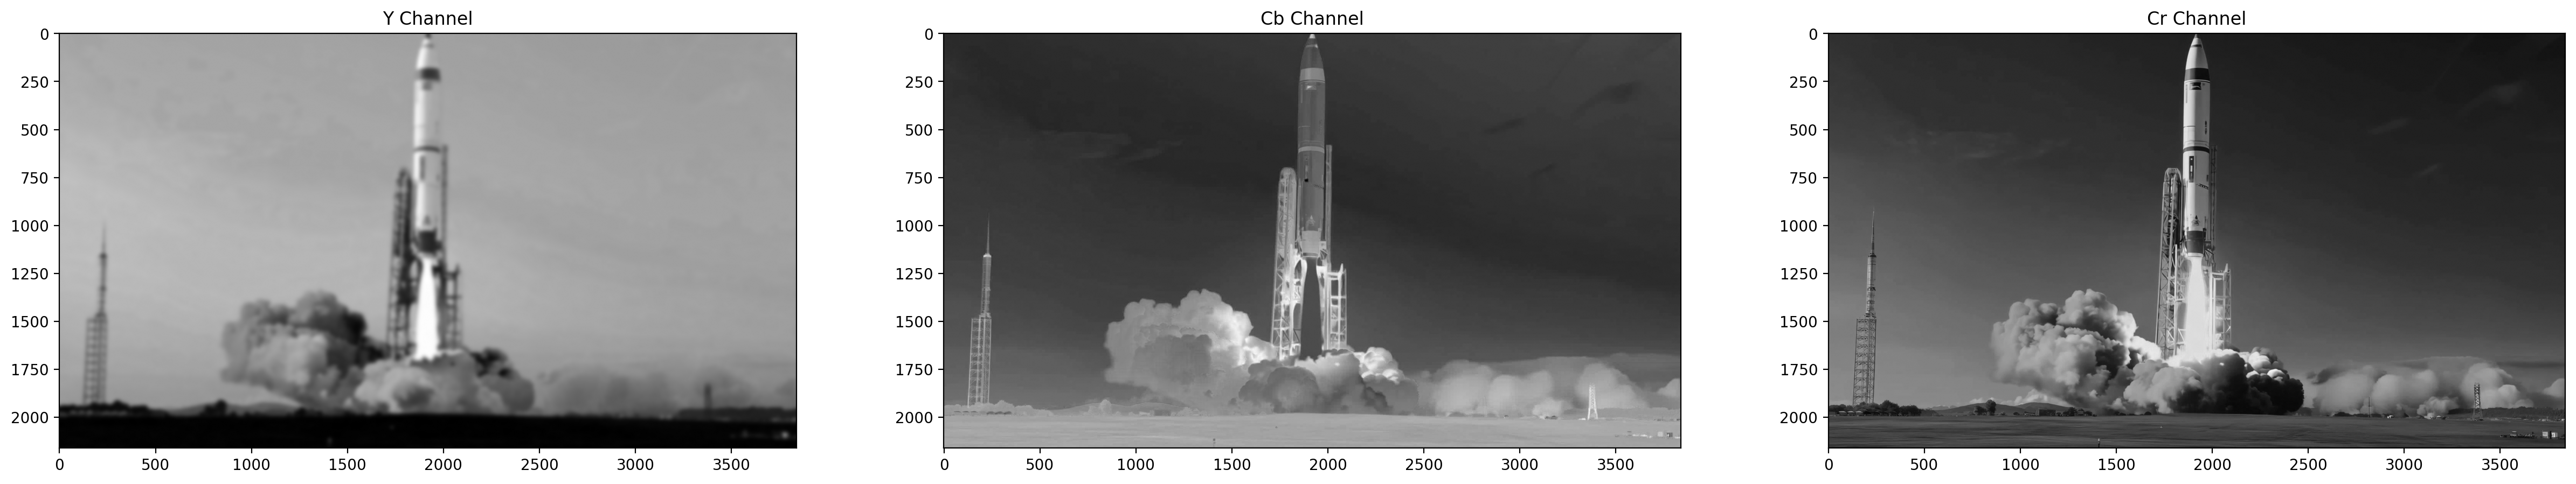

In [165]:
sigma = 10
reconstructed, filtered = compress_Y(razzo_ycbcr, sigma)

fig, axes = plt.subplots(1, 3, figsize=(30, 12), dpi = 200)
axes[0].imshow(filtered[:,:,0], cmap='gray'); axes[0].set_title('Y Channel')
axes[1].imshow(filtered[:,:,1], cmap='gray'); axes[1].set_title('Cb Channel')
axes[2].imshow(filtered[:,:,2], cmap='gray'); axes[2].set_title('Cr Channel')
plt.show()

The Y channel will be blurred, the effect of blurring will be more noticeable, as the Gaussian filter with sigma = 10 has a significant impact on brightness.

Since the Cb channel has not been changed, you will see the original channel, representing the blue colour component. Similarly, the Cr channel will remain unchanged, showing the original red colour component.